### EV Charger Models - Grouped by City _Population Observation Counts

#### Overview

Majority of updates in the data.gov alternative fuels data set were made in August 2017

Total number of charge stations = 53301

ev_total (mean) = 2.68 > charge stations per location

evdcfastcount > DC Fast Chargers % of total = 12%

evlevel1evsenum > Level 1 EVSE (standard 110V outlet) % of total = 6%

evlevel2evsenum > Level 2 EVSE (J1772 connector) % of total = 82%


#### Notes

Not a logistic regression because we are not attempting to determine a category

We are predicting how many and what type of ev charger to install per population count

To clean up the notebook and reduce rows I removed the checks including head, shape, isnull, describe, nunique, value counts, etc.

Model: Grouped by city, not great scores but started with 0.07!  Got them above 65 for the most popular types

EV Types: Fast = super fast charger / 110 = standard 110 outlet charger (super slow) / 220 = 220 outlet charger like a dryer in a house runs on (fairly quick and the most popular)

Goal: Predict how many and which type of charger to install for varying population groups

#### Grouped by City _Population Observation Counts

median > over 2.5k, under 5k 

over 500k = 31  /  over 250k, under 500k = 48  /  over 100k, under 250k = 208  /  over 75k, under 100k = 146  /  over 50k, under 75k = 255  /  over 25k, under 50k = 515  /  over 15k, under 25k = 397

over 7.5k, under 15k = 506 < our city population category match

over 5k, under 7.5k = 221  /  over 2.5k, under 5k = 250  /  over 100, under 2.5k = 375

#### import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 2 new prepped dataframes saved locally in csv format > 1. data.gov: ev data  /  2. cencus.gov: state, city, population

In [2]:
df_ev = pd.read_csv('ev_new.csv', error_bad_lines=False, index_col=False, dtype='unicode')

In [3]:
df_ev_pop = pd.read_csv('ev_citystatepop.csv', error_bad_lines=False, index_col=False, dtype='unicode')

In [5]:
# df_ev_drop = df_ev.drop(['id', 'city', 'state'], axis=1)
df_ev_drop = df_ev.drop(['city', 'state'], axis=1)

#### formatting

In [7]:
df_ev_drop[('evdcfastcount')] = df_ev_drop[('evdcfastcount')].astype(int)
df_ev_drop[('evlevel1evsenum')] = df_ev_drop[('evlevel1evsenum')].astype(int)
df_ev_drop[('evlevel2evsenum')] = df_ev_drop[('evlevel2evsenum')].astype(int)
df_ev_drop[('ev_total')] = df_ev_drop[('ev_total')].astype(int)
df_ev_drop[('id')] = df_ev_drop[('id')].astype(int)

In [8]:
df_ev_drop.evdcfastcount.fillna(value=0, inplace=True)
df_ev_drop.evlevel1evsenum.fillna(value=0, inplace=True)
df_ev_drop.evlevel2evsenum.fillna(value=0, inplace=True)

In [63]:
# df_ev_pop['citystate'] = df_ev_pop['citystatepop']

In [12]:
df_ev_pop[('citystate')] = df_ev_pop[('citystate')].astype(str)
df_ev_pop[('pop')] = df_ev_pop[('pop')].astype(int)

In [13]:
df_ev_pop.dtypes

citystate    object
pop           int32
dtype: object

#### set index of both dataframes to 'citystate' to merge on

In [14]:
# df.set_index('Locality', inplace=True)
df_ev_drop2 = df_ev_drop.set_index('citystate')

In [16]:
df_ev_pop2 = df_ev_pop.set_index('citystate')

#### merge on 'citystate' to introduce population into the data set

In [18]:
df_ev_merge = pd.merge(df_ev_drop2, df_ev_pop2, right_index=True, left_index=True)

In [21]:
df_ev_merge.shape

(16617, 6)

#### this is the grouped command section

In [22]:
df_ev_grouped = df_ev_merge.groupby(['citystate', 'pop']).sum()

In [60]:

# IMPORTANT > 'pop' and 'id' are now a sub DFs. 
# Must add a new column that converts it them to int before they can be used in a model (pop_x) / (id_x)


In [23]:
df_ev_grouped.head()

,,id,evdcfastcount,evlevel1evsenum,evlevel2evsenum,ev_total
citystate,pop,,,,,
AbbotsfordWI,2259,19458,0,1,0,1
AberdeenMD,15612,19380,0,0,2,2
AberdeenNC,7502,82694,0,0,10,10
AberdeenSD,28415,53098,0,0,6,6
AberdeenWA,16334,25517,8,0,0,8


In [111]:
# ev_total zeros removal (just in case there are any)
df_ev_config = df_ev_grouped[df_ev_grouped.ev_total != 0]

#### final dataframes config and checks

In [114]:
# Reset index for use in model
df_ev_config = df_ev_grouped.reset_index()

In [ ]:

# Conversion of 'pop' and 'id' as a new int columns


In [116]:
df_ev_config[('pop_x')] = df_ev_config[('pop')].astype(int)
df_ev_config[('id_x')] = df_ev_config[('id')].astype(int)

In [121]:
df_ev_config.sort_values(by = 'pop', ascending=False)

,citystate,pop,id,evdcfastcount,evlevel1evsenum,evlevel2evsenum,ev_total,pop_x,id_x
1850,New YorkNY,8537673,5573787,4,21,483,508,8537673,5573787
1541,Los AngelesCA,3976322,6315494,37,78,1626,1741,3976322,6315494
475,ChicagoIL,2704958,2045565,16,24,299,339,2704958,2045565
1228,HoustonTX,2303482,2049347,23,44,353,420,2303482,2049347
2081,PhoenixAZ,1615017,1841499,23,0,282,305,1615017,1841499
2079,PhiladelphiaPA,1567872,742267,11,3,90,104,1567872,742267
2327,San AntonioTX,1492510,1251414,0,5,192,197,1492510,1251414
2332,San DiegoCA,1406630,4334756,43,9,965,1017,1406630,4334756
636,DallasTX,1317929,1885537,8,2,246,256,1317929,1885537
2336,San JoseCA,1025350,2523640,29,26,535,590,1025350,2523640


#### population category research

In [124]:
df_ev_config[(df_ev_config['pop_x'] >= 100) & (df_ev_config['pop_x'] <= 2500)].shape

(375, 9)

#### population entry

In [125]:
df_ev_final = df_ev_config[(df_ev_config['pop_x'] > 7500) & (df_ev_config['pop_x'] < 15000)]

#### individual data frames for each charger type

#### 1. Fast dataframe

In [136]:
df_ev1 = df_ev_final[df_ev_final.evdcfastcount != 0]

In [138]:
df_ev1[('pop_x')] = df_ev1[('pop_x')].astype(int)
# df_ev1[('id_fast')] = df_ev1[('id_x')].astype(int)

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### define new column to divde population by ev type to obtain a more alternative sample size

In [144]:
# Takes the total number of chargers per  to one population segment
df_ev1['pop_div'] = df_ev1.pop_x / df_ev1.evdcfastcount

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [146]:
df_ev1[('pop_div')] = df_ev1[('pop_div')].astype(int)

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### features setup

In [216]:
df_ev_fast = df_ev1.drop(['citystate', 'pop', 'id', 'ev_total'], axis=1)

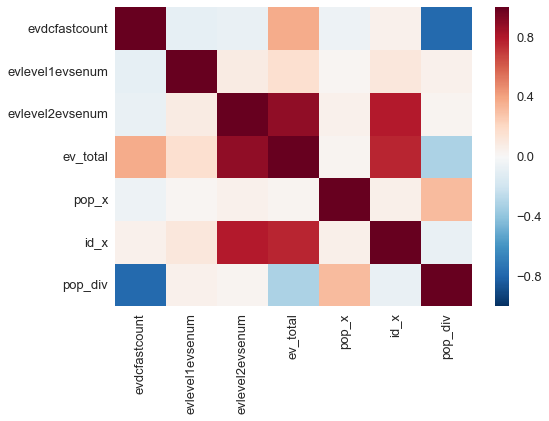

In [152]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(df_ev_fast.corr())
sns.set(font_scale = 1.5)

##### create categories

In [217]:
fast_x = df_ev_fast.drop(['evdcfastcount'], axis=1)

In [188]:
fast_y = df_ev_fast.evdcfastcount

#### ran multiple scatter plot tests on individual x features

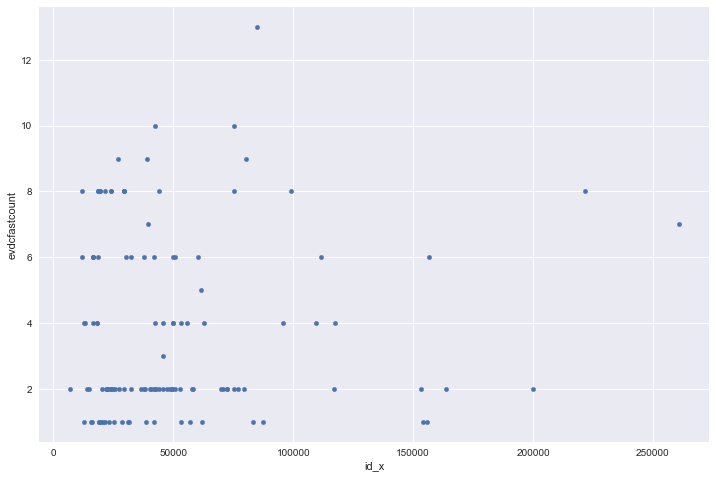

In [280]:
sns.set(font_scale = 1)
df_ev_fast.plot(kind='scatter', x='id_x', y='evdcfastcount', figsize=(12, 8))

#### 2. 110 dataframe

In [271]:
df_ev2 = df_ev_final[df_ev_final.evlevel1evsenum != 0]

In [272]:
df_ev2[('pop_x')] = df_ev2[('pop_x')].astype(int)

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [273]:
df_ev2['pop_div'] = df_ev2.pop_x / df_ev2.evlevel1evsenum

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [274]:
df_ev2[('pop_div')] = df_ev2[('pop_div')].astype(int)

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [275]:
df_ev_110 = df_ev2.drop(['citystate', 'pop', 'id', 'ev_total'], axis=1)

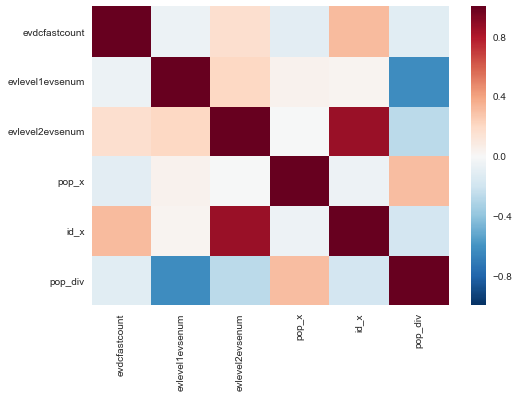

In [276]:
sns.heatmap(df_ev_110.corr())
sns.set(font_scale = 1.5)

In [277]:
x_110 = df_ev_110.drop(['evlevel1evsenum'], axis=1)

In [278]:
y_110 = df_ev_110.evlevel1evsenum

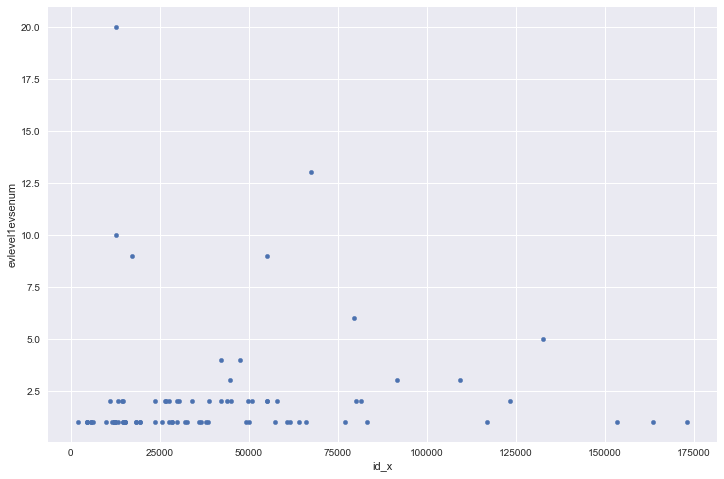

In [281]:
sns.set(font_scale = 1)
df_ev_110.plot(kind='scatter', x='id_x', y='evlevel1evsenum', figsize=(12, 8))

#### 3. 220 dataframe

In [282]:
df_ev3 = df_ev_final[df_ev_final.evlevel2evsenum != 0]

In [283]:
df_ev3[('pop_x')] = df_ev3[('pop_x')].astype(int)

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [284]:
df_ev3['pop_div'] = df_ev3.pop_x / df_ev3.evlevel2evsenum

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [285]:
df_ev3[('pop_div')] = df_ev3[('pop_div')].astype(int)

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [286]:
df_ev_220 = df_ev3.drop(['citystate', 'pop', 'id', 'ev_total'], axis=1)

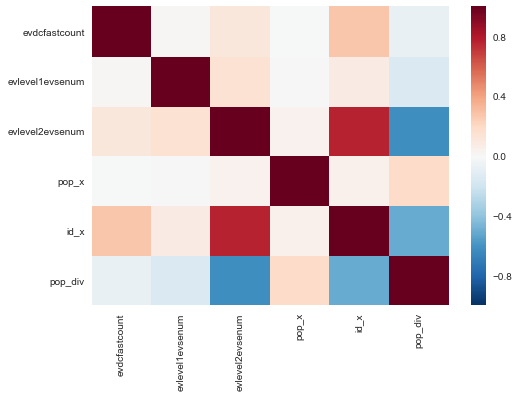

In [287]:
sns.heatmap(df_ev_220.corr())
sns.set(font_scale = 1.5)

In [288]:
x_220 = df_ev_220.drop(['evlevel2evsenum'], axis=1)

In [289]:
y_220 = df_ev_220.evlevel2evsenum

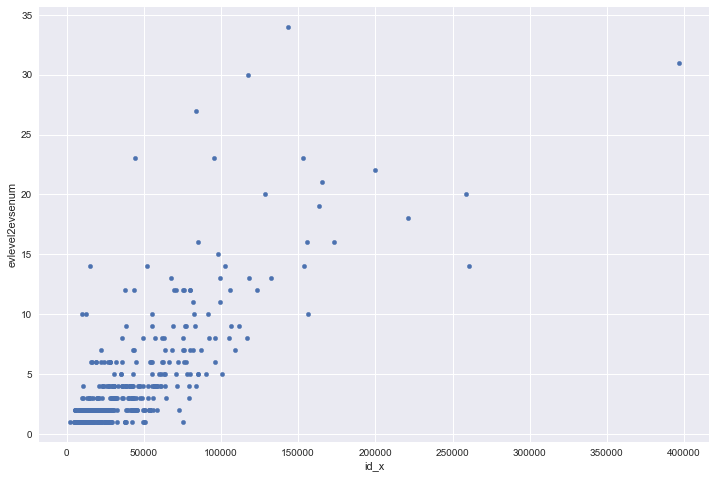

In [290]:
sns.set(font_scale = 1)
df_ev_220.plot(kind='scatter', x='id_x', y='evlevel2evsenum', figsize=(12, 8))

#### Model Prep

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model, metrics
import numpy as np
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Fast Charger Model Build

Notes: 

In [205]:
# instantiate, fit
lr = LinearRegression()
lr.fit(fast_x, fast_y)

# print coefficients
zip(fast_x, lr.coef_)

[('evlevel1evsenum', -0.19562390552656891),
 ('evlevel2evsenum', -0.063835879365526038),
 ('pop_x', 0.00028249141162044975),
 ('id_x', 5.670585411127454e-06),
 ('pop_div', -0.00067043761270646268)]

In [206]:
# calculate the R-squared
lr.score(fast_x, fast_y)

0.65916615738113515

In [207]:
lr.predict(fast_x)

array([ 3.63482218,  5.54254893,  3.54320097,  0.23993229,  3.23877286,
        4.66705378,  6.03577165,  5.72902232,  3.4921442 ,  6.80286958,
        3.47439252,  3.29730371,  3.07863281,  3.71459602,  6.68915197,
        3.58952145,  5.9007381 ,  6.18847977,  5.01681023,  3.41333887,
        6.22932859,  3.67118465,  3.72626748,  5.11867177,  0.86070395,
        5.62054032,  5.22339826,  3.65922771,  3.34659477,  0.28648227,
       -1.39556203,  6.24351389,  2.57990044,  3.61445185,  6.55869865,
        3.2695588 ,  3.37072091,  3.48576058,  5.13084095,  0.55845401,
        6.95439196,  5.41765834,  5.75435997,  5.43736815,  6.63543517,
        3.29908814,  0.70323598,  3.47429251,  4.96681281,  6.18749666,
        3.63164349, -1.67179355,  5.8562768 ,  0.75556585,  6.73438417,
        3.54667897, -0.38108534, -1.0074181 ,  5.41947174,  5.42657859,
        5.45802304,  5.76019421, -1.40131505,  6.17011424,  5.31013784,
        3.35130948,  5.14398998,  6.33928762,  3.5403119 ,  3.62

In [209]:
lr.predict(fast_x).mean()

3.785123966942149

In [242]:
# Training setup, with random state
training_data,holdout = train_test_split(df_ev_fast,test_size=0.5,random_state=123)

In [299]:
# KFold setup (ran folds at 5, switched to 3, then 2 for smaller dataset and received improved results)
n_fast = training_data.shape[0]
kf_fast = KFold(fast_x.shape[0],n_folds=2,random_state=1)

In [300]:
### DEFINE X AND Y

MAE_score = []
MSE_score = []
R2_scores = []
RMSE_score = []

# Use K-Folds cross validation to train your model / kfolds loop (define scores in the loop)
# Fill-in the kfolds-loop:
# use iloc with scikit

for train_index, test_index in kf_fast:
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = fast_x.iloc[train_index], fast_x.iloc[test_index]
    y_train, y_true = fast_y.iloc[train_index], fast_y.iloc[test_index] 
    
    # Fit your model on your training x and training y
    lr.fit(x_train,y_train)
    y_preds = lr.predict(x_test)
    
    fold_score_fast1 = mean_squared_error(y_true,y_preds)
    MSE_score.append(fold_score_fast1)
    
    fold_score_fast2 = mean_absolute_error(y_true,y_preds)
    MAE_score.append(fold_score_fast2)
    
    fold_score_fast3 = r2_score(y_true,y_preds)
    R2_scores.append(fold_score_fast3)
    
    fold_score_fast4 = sqrt(mean_squared_error(y_true,y_preds))
    RMSE_score.append(fold_score_fast4)


In [301]:
zip(fast_x, lr.coef_)

[('evlevel1evsenum', 0.22777800011464461),
 ('evlevel2evsenum', -0.10344083860141112),
 ('pop_x', 0.00032778377282834657),
 ('id_x', 7.8984439954141848e-06),
 ('pop_div', -0.00069899582567874662)]

In [302]:
lr.predict(x_test)

array([ 5.67684309, -1.76166914,  6.21072163,  4.86402103,  3.12048691,
        5.02058628,  6.35030453,  3.25688584,  3.47415485,  5.47508645,
       -0.33519498,  3.43187887,  3.72888629,  2.89488812, -0.33438047,
        4.06333322,  5.52001929,  0.17751319,  2.62511858, -1.22341748,
        6.07824276,  0.03335162,  2.96287236,  3.43854409,  3.31513674,
        5.67017298,  4.78775865,  0.21195085,  4.9766653 ,  4.0599606 ,
        6.36482922,  5.31526547,  5.5011659 , -0.48110733,  3.40881617,
        3.25819517,  3.23042131,  5.37278114,  3.45189352,  7.36840435,
        5.5879857 , -1.61316583,  6.27844892,  6.81746324,  3.45002171,
        5.41411518,  5.36025929,  3.22702467, -1.89153218,  3.50269831,
        6.16456602,  1.92844658,  3.42403826,  4.83764163, -0.48698614,
        3.55862614,  6.37216604,  3.4755573 ,  5.85555463,  0.83257601])

In [303]:
lr.predict(x_test).mean()

3.5442815406519075

In [304]:
y_preds.mean()

3.5442815406519075

In [305]:
y_true.mean()

3.683333333333333

In [306]:
# mean squared error
MSE_score

[2.4109321458540829, 3.1744661966854713]

In [307]:
# mean absolute error
MAE_score

[1.3598904995797729, 1.477374461624319]

In [308]:
# root squared mean error
RMSE_score

[1.5527176645656102, 1.7817031730020214]

In [309]:
# root squared
R2_scores

[0.67332756118552761, 0.59037677665623511]

In [310]:
# normalize view
lr.intercept_

3.5028326116802129

In [311]:
list(lr.predict(x_test)[0:5]) 

[5.6768430892972912,
 -1.761669143547012,
 6.2107216267498249,
 4.8640210280994651,
 3.1204869102999169]

In [ ]:
# Holdout Testing

In [312]:
# Training setup
training_data = holdout

In [313]:
holdout.head()

,evdcfastcount,evlevel1evsenum,evlevel2evsenum,pop_x,id_x,pop_div
110,2,0,1,13748,6837,6874
2395,4,3,7,7678,109355,1919
1755,2,1,19,7535,163693,3767
2669,2,0,0,11113,23821,5556
780,6,0,0,12655,16542,2109


In [314]:
holdout.dtypes

evdcfastcount      int32
evlevel1evsenum    int32
evlevel2evsenum    int32
pop_x              int32
id_x               int32
pop_div            int32
dtype: object

In [315]:
# Error on fast_x set > Must pass DataFrame with boolean values only
fast_x = holdout[fast_x]
fast_y = holdout[fast_y]

ValueError: Must pass DataFrame with boolean values only

In [254]:
holdout[fast_x].head()

ValueError: Must pass DataFrame with boolean values only

In [316]:
lr.predict(fast_x).mean()

3.7161726647860696

In [317]:
lr.predict(fast_x)

array([ 3.48070973,  5.38070157,  3.66187061, -0.07531236,  3.15486744,
        4.0159049 ,  5.99903317,  5.62877321,  3.50357926,  6.77630636,
        3.38990441,  3.25776521,  2.5902602 ,  3.5143354 ,  6.73759626,
        3.4280818 ,  5.80424046,  6.18660569,  4.86013544,  3.27370354,
        6.24457236,  3.50524591,  3.64369277,  5.47682991,  0.4088686 ,
        5.533437  ,  5.15362379,  3.53762691,  3.14274348,  0.01318542,
       -1.66320403,  6.30741012,  2.31028495,  3.50557589,  6.64310482,
        3.83655831,  3.52231388,  3.42837465,  5.28839501,  0.16981117,
        7.10912891,  5.33593112,  5.56592729,  5.29928012,  6.69842409,
        3.09724421,  0.59885575,  3.22087799,  5.01846435,  5.92136478,
        3.483562  , -1.06419006,  6.74924838,  0.45601385,  6.84430237,
        3.32909349, -0.62165777, -1.35580276,  6.04910831,  5.25982105,
        5.42748931,  5.67684309, -1.76166914,  6.21072163,  4.86402103,
        3.12048691,  5.02058628,  6.35030453,  3.25688584,  3.47

#### grid search

In [318]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='neg_mean_squared_error')

gs.fit(fast_x, fast_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [319]:
# new population divide feature reduced score to -16 from -18
print(gs.best_score_)

-2.82181422096


In [320]:
print(-gs.best_score_)

2.82181422096


In [321]:
print(gs.best_estimator_)

Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [268]:
print(gs.grid_scores_)

[mean: -2.92217, std: 0.34786, params: {'alpha': 1e-10}, mean: -2.92217, std: 0.34786, params: {'alpha': 1.0000000000000001e-09}, mean: -2.92217, std: 0.34786, params: {'alpha': 1e-08}, mean: -2.92217, std: 0.34786, params: {'alpha': 9.9999999999999995e-08}, mean: -2.92217, std: 0.34786, params: {'alpha': 9.9999999999999995e-07}, mean: -2.92217, std: 0.34786, params: {'alpha': 1.0000000000000001e-05}, mean: -2.92217, std: 0.34786, params: {'alpha': 0.0001}, mean: -2.92217, std: 0.34785, params: {'alpha': 0.001}, mean: -2.92212, std: 0.34782, params: {'alpha': 0.01}, mean: -2.92160, std: 0.34745, params: {'alpha': 0.10000000000000001}, mean: -2.91662, std: 0.34401, params: {'alpha': 1.0}, mean: -2.88152, std: 0.32374, params: {'alpha': 10.0}, mean: -2.82181, std: 0.31063, params: {'alpha': 100.0}, mean: -2.83476, std: 0.32439, params: {'alpha': 1000.0}, mean: -2.86459, std: 0.33465, params: {'alpha': 10000.0}, mean: -2.87076, std: 0.33608, params: {'alpha': 100000.0}, mean: -2.87056, st

In [322]:
lm = linear_model.LinearRegression().fit(fast_x, fast_y)
print("~~~ OLS ~~~")
print('OLS MSE: ', metrics.mean_squared_error(fast_y, lm.predict(fast_x)))
print('OLS R2:', lm.score(fast_x, fast_y))

lm = linear_model.Lasso().fit(fast_x, fast_y)
print("~~~ Lasso ~~~")
print('Lasso MSE: ', metrics.mean_squared_error(fast_y, lm.predict(fast_x)))
print('Lasso R2:', lm.score(fast_x, fast_y))

lm = linear_model.Ridge().fit(fast_x, fast_y)
print("~~~ Ridge ~~~")
print('Ridge MSE: ', metrics.mean_squared_error(fast_y, lm.predict(fast_x)))
print('Ridge R2:', lm.score(fast_x, fast_y))

~~~ OLS ~~~
('OLS MSE: ', 2.5813606633860711)
('OLS R2:', 0.65916615738113515)
~~~ Lasso ~~~
('Lasso MSE: ', 2.6456286592560105)
('Lasso R2:', 0.65068043576134726)
~~~ Ridge ~~~
('Ridge MSE: ', 2.581365434990341)
('Ridge R2:', 0.6591655273551793)


#### 110 Charger Model Build (simple model run through only for initial score, very low number of instances for 110s overall)

Notes: 

In [327]:
# create X and y
X_110 = x_110
y_110 = y_110

# instantiate, fit
lr = LinearRegression()
lr.fit(X_110, y_110)

# print coefficients
zip(X_110, lr.coef_)

[('evdcfastcount', -0.095376431601758085),
 ('evlevel2evsenum', 0.21674946902299988),
 ('pop_x', 0.00030076012896063152),
 ('id_x', -2.9193520821260641e-05),
 ('pop_div', -0.0005484563803167552)]

In [328]:
lr.score(X_110, y_110)

0.50545979613607395

In [329]:
lr.predict(fast_x)

array([ 3.33474521,  4.64897977,  2.16666627,  0.9249676 ,  4.12390438,
        8.22257464,  5.46658391,  5.0748017 ,  2.84083734,  6.66674997,
        3.17126589,  3.36150008,  4.57817575,  3.29094246,  4.34872206,
        3.15705869,  5.27927971,  5.547418  ,  4.84314266,  3.09112507,
        5.30173114,  3.09051211,  2.33402594,  4.28530204,  1.25540616,
        4.26166468,  4.83128789,  2.74067848,  3.79673757,  0.67598351,
       -0.11941304,  5.90849562,  4.46250109,  3.0068769 ,  5.68623907,
        2.93100862,  3.2991255 ,  3.36689623,  5.51616815,  1.31078184,
        4.73217061,  4.97471079,  4.52671632,  4.64453231,  5.84404089,
        3.4014424 ,  1.25649738,  3.61152734,  3.84226605,  3.62350998,
        3.3180861 , -0.68004844,  5.07192634,  0.44605996,  6.28310019,
        3.56376208,  0.19761275,  0.67313857,  4.81987277,  4.99609994,
        5.97770642,  4.75366998,  0.50133083,  5.35163491,  5.51867382,
        4.0896019 ,  4.30049357,  6.29531108,  3.17521725,  3.35

In [330]:
lr.predict(fast_x).mean()

3.6499428118082728

#### 220 Charger Model Build (simple model run through only for initial score)

Notes: 

In [331]:
# create X and y
X_220 = x_220
y_220 = y_220

# instantiate, fit
lr = LinearRegression()
lr.fit(X_220, y_220)

# print coefficients
zip(X_220, lr.coef_)

[('evdcfastcount', -0.22073592891615074),
 ('evlevel1evsenum', 0.22188279488169593),
 ('pop_x', 0.00015468555839017123),
 ('id_x', 7.4731757755410583e-05),
 ('pop_div', -0.00044272338549660719)]

In [332]:
lr.score(X_220, y_220)

0.68274032881163471

In [333]:
lr.predict(fast_x)

array([  2.79412946,   7.82603676,  11.53237026,   0.68977069,
         1.55648684,  14.60058945,   4.10403913,   4.01729154,
         4.841803  ,  10.58676729,   4.76996809,   5.06375205,
         8.93332079,   2.90439802,  16.81066647,   4.8034024 ,
         4.88994135,   4.37626726,   3.68674974,   7.30561957,
         4.98577094,   4.19579161,   6.91086695,   6.15060237,
         5.40579959,   5.38978622,   3.51622976,   5.87050883,
         4.72227054,   0.50061057,   0.29848166,   4.00038137,
        17.31133158,   4.41179298,   5.15126322,   6.00293802,
         5.52657583,   2.71555627,   8.55847041,   2.17955655,
         8.9205959 ,   8.07710221,  12.88869108,   5.00760273,
         6.72998175,   8.0659225 ,   7.52651201,   5.19399036,
         5.24664357,  23.32962484,   2.83787568,   0.8951516 ,
         6.53798315,   3.63207787,   4.45310437,   3.7613485 ,
         0.11702136,   0.23867029,   9.76329825,   5.1156729 ,
         3.71541151,   4.75054777,   0.5976493 ,   5.73

In [334]:
lr.predict(fast_x).mean()

5.9195009314029647